In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\amith\Downloads\student\student-mat.csv", sep=';')

In [8]:
# printing the first 5 rows
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [9]:
#printing the sum of null values of each column its datatype and the shape 
print(" Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)
print("Dataset Shape (rows, columns):", df.shape)


 Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher  

In [10]:
#cleaning the data removing the duplicates and by median filling the data
df_cleaned = df.drop_duplicates()
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)

In [11]:
average_g3 = df_cleaned['G3'].mean()
print("Average Final Grade (G3):", round(average_g3, 2))

Average Final Grade (G3): 10.42


In [12]:
above_15 = df_cleaned[df_cleaned['G3'] > 15].shape[0]
print("Students scoring above 15 in G3:", above_15)

Students scoring above 15 in G3: 40


In [13]:
correlation = df_cleaned['studytime'].corr(df_cleaned['G3'])
print("Correlation between study time and G3:", round(correlation, 4))

Correlation between study time and G3: 0.0978


In [14]:
gender_avg = df_cleaned.groupby('sex')['G3'].mean()
print("Average G3 by Gender:\n", gender_avg)

Average G3 by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


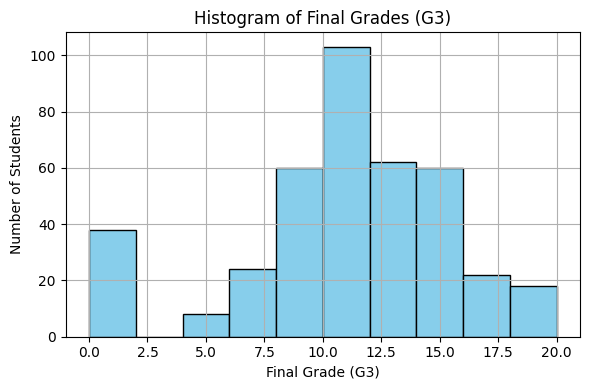

In [15]:
plt.figure(figsize=(6, 4))
plt.hist(df_cleaned['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.grid(True)
plt.tight_layout()
plt.show()

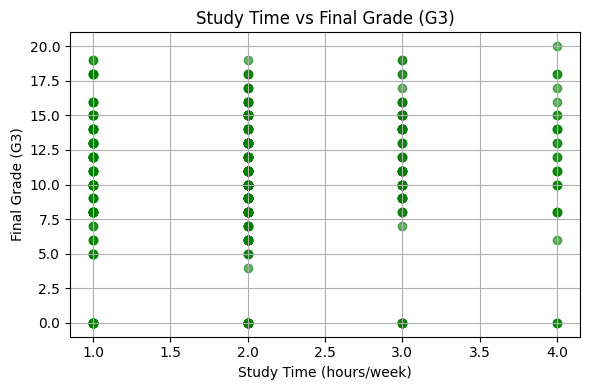

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(df_cleaned['studytime'], df_cleaned['G3'], alpha=0.6, color='green')
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (hours/week)")
plt.ylabel("Final Grade (G3)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\amith\AppData\Local\Temp\ipykernel_9732\1369445767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='Set2')


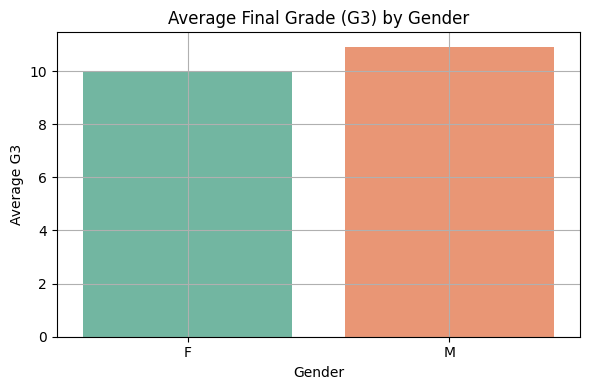

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='Set2')
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.grid(True)
plt.tight_layout()
plt.show()